# Example queries for demographics on COVID-19 Knowledge Graph
[Work in progress]

This notebook demonstrates how to run Cypher queries to get Demographics from the American Community Survey 5-year data at different levels of geographic granularity.

Demographics includes total population, and population by sex, race, ethnicity, and age group.

In [29]:
import datetime
import pandas as pd
from py2neo import Graph

In [30]:
pd.options.display.max_rows = None  # display all rows
pd.options.display.max_columns = None  # display all columsns

#### Connect to COVID-19-Net Knowledge Graph

In [31]:
graph = Graph("bolt://132.249.238.185:7687", user="reader", password="demo")

### Get demographics by Zip code

In [39]:
zip_code = '90210'

##### Total population and sex

In [40]:
query = """
MATCH (p:PostalCode{name:$zip_code})-[:HAS_DEMOGRAPHICS]-(d:Demographics)
RETURN p.name, d.totalPopulation, d.male, d.female
"""
df = graph.run(query, zip_code=zip_code).to_data_frame()
df.head()

,p.name,d.totalPopulation,d.male,d.female
0,90210,19909,9599,10310


##### Total population and race

In [41]:
query = """
MATCH (p:PostalCode{name:$zip_code})-[:HAS_DEMOGRAPHICS]-(d:Demographics)
RETURN p.name, d.totalPopulation, d.white, d.blackOrAfricanAmerican, d.americanIndianAndAlaskaNative, 
       d.nativeHawaiianAndOtherPacificIslander,d.otherRace, d.twoOrMoreRaces
"""
df = graph.run(query, zip_code=zip_code).to_data_frame()
df.head()

,p.name,d.totalPopulation,d.white,d.blackOrAfricanAmerican,d.americanIndianAndAlaskaNative,d.nativeHawaiianAndOtherPacificIslander,d.otherRace,d.twoOrMoreRaces
0,90210,19909,16911,None,21,0,313,684


##### Total population and ethnicity
This example lists the total population and ethnicity for Zip codes with the place name Chula Vista (California)

In [57]:
place_name = 'Chula Vista'

query = """
MATCH (p:PostalCode{placeName:$place_name})-[:HAS_DEMOGRAPHICS]-(d:Demographics)
RETURN p.name as `Zip code`, p.placeName, d.totalPopulation, d.hispanicOrLatino as `Hispanic or Latino`, 
       d.notHispanicOrLatino as `not Hispanic or Latino`
"""
df = graph.run(query, place_name=place_name).to_data_frame()
df.head()

,Zip code,p.placeName,d.totalPopulation,Hispanic or Latino,not Hispanic or Latino
0,91910,Chula Vista,74297,45307,28990
1,91911,Chula Vista,85365,61189,24176
2,91913,Chula Vista,53072,24788,28284
3,91914,Chula Vista,16357,7490,8867
4,91915,Chula Vista,31740,15287,16453


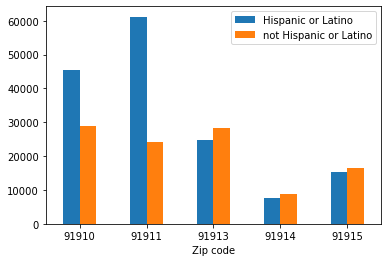

In [59]:
df.plot.bar(x='Zip code', y=['Hispanic or Latino', 'not Hispanic or Latino'], rot=0);

##### Total population and age groups

In [65]:
query = """
MATCH (p:PostalCode{name:$zip_code})-[:HAS_DEMOGRAPHICS]-(d:Demographics)
RETURN p.name, d.totalPopulation, d.age0_4, d.age5_9, d.age10_14, d.age15_19, d.age20_24, 
       d.age25_34, d.age35_44, d.age45_54, d.age55_59, d.age65_74, d.age75_84, d.age85
"""
df = graph.run(query, zip_code=zip_code).to_data_frame()
df.head()

,p.name,d.totalPopulation,d.age0_4,d.age5_9,d.age10_14,d.age15_19,d.age20_24,d.age25_34,d.age35_44,d.age45_54,d.age55_59,d.age65_74,d.age75_84,d.age85
0,90210,19909,710,1014,1482,1066,519,1956,2292,3143,1282,2562,1695,None


# Get demographics by US Census tract

##### Aggreated data for a US county (Admin2)

In [66]:
county = 'San Diego County'

In [68]:
query = """
MATCH (a:Admin2{name: $county})<-[:IN]-(t:Tract)-[:HAS_DEMOGRAPHICS]-(d:Demographics)
RETURN a.name as County, d.white as White, d.blackOrAfricanAmerican as `Black or African American`, 
       d.americanIndianAndAlaskaNative as `American Indian and Alaskan Native`, 
       d.nativeHawaiianAndOtherPacificIslander as `Native Hawaiian and other Pacific Islander`, 
       d.otherRace, as `other Race`, d.twoOrMoreRaces as `two or more Races`
"""
df = graph.run(query, county=county).to_data_frame()
df.head()

""


In [ ]:
df.plot.bar(x='County', y=['White', 'Black or African American', 'American Indian and Alaskan Native',
                           'Native Hawaiian and other Pacific Islander', 'other Race', 'two or more Races'], rot=0);